In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../../..")))

from src.scripts.analysis.functional_clustering import (
    get_station_daytype_signatures,
    cluster_stations_by_daytype,
    visualize_clusters_per_date_type,
    flatten_feature_matrix,
    test_clustering_stability_and_quality,
)

from src.constants.seed import SEED

In [10]:

features_df = get_station_daytype_signatures(lambda_type="out", normalize=True)
feature_mat = flatten_feature_matrix(features_df)

In [11]:
wd_features = feature_mat[feature_mat["date_type"] == "WD"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,0.881298,0.416884
1,3,0.818691,0.310106
2,4,0.775502,0.323227
3,5,0.680761,0.301354
4,6,0.634280,0.261244


In [12]:
wd_features = feature_mat[feature_mat["date_type"] == "SA"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,0.962684,0.424758
1,3,0.538645,0.301265
2,4,0.549892,0.316842
3,5,0.626855,0.309930
4,6,0.716464,0.267971


In [13]:
wd_features = feature_mat[feature_mat["date_type"] == "SU"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,0.962482,0.334587
1,3,0.530558,0.297108
2,4,0.453195,0.294560
3,5,0.446836,0.236820
4,6,0.443053,0.211199


In [14]:
wd_features = feature_mat[feature_mat["date_type"] == "HO"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,1.000000,0.379698
1,3,0.698267,0.327978
2,4,0.512744,0.321824
3,5,0.576193,0.284362
4,6,0.688663,0.234113


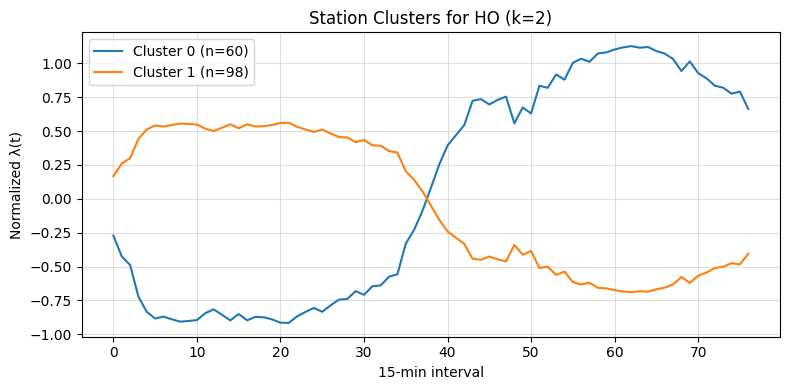

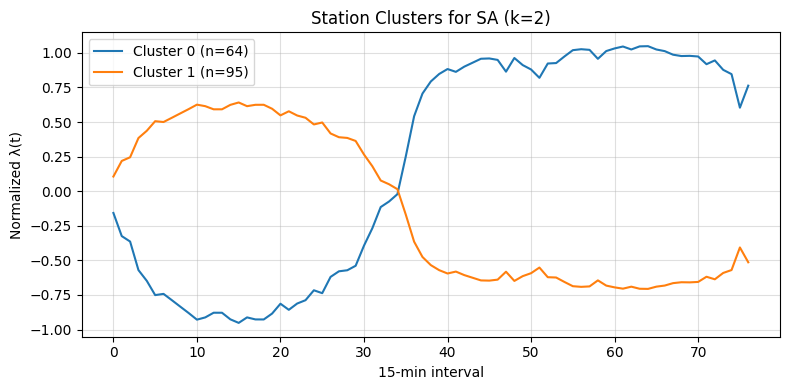

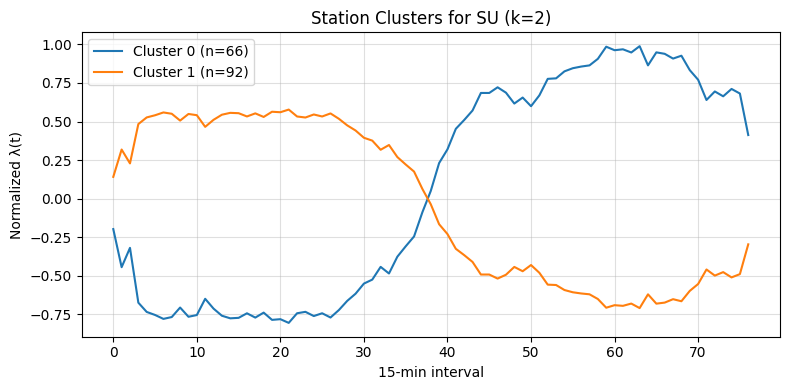

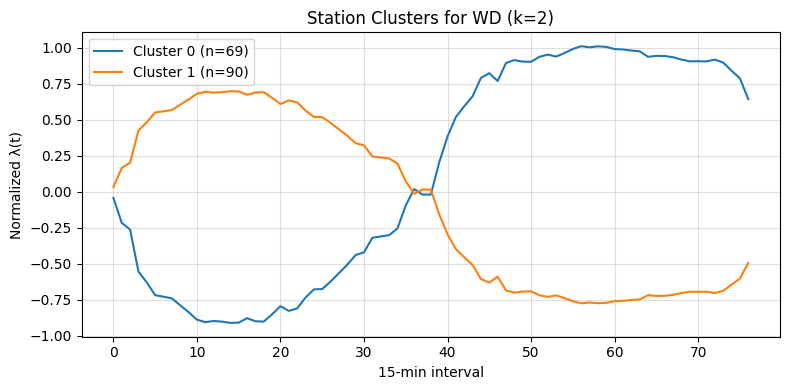

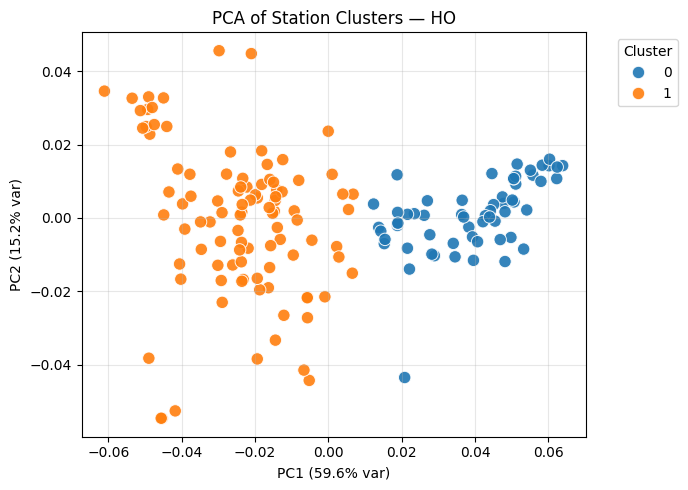

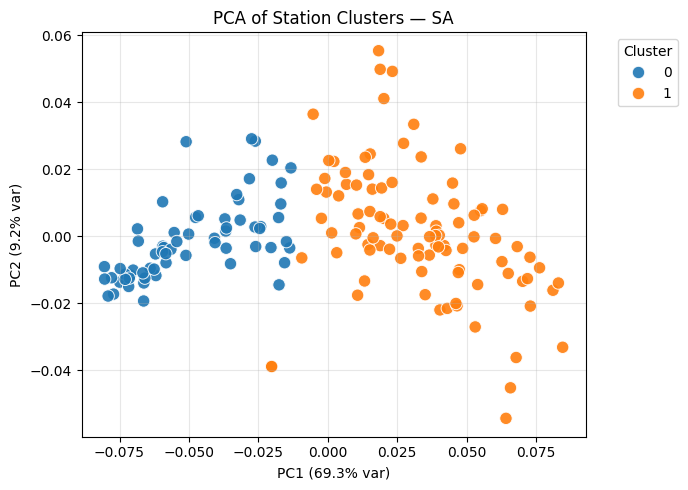

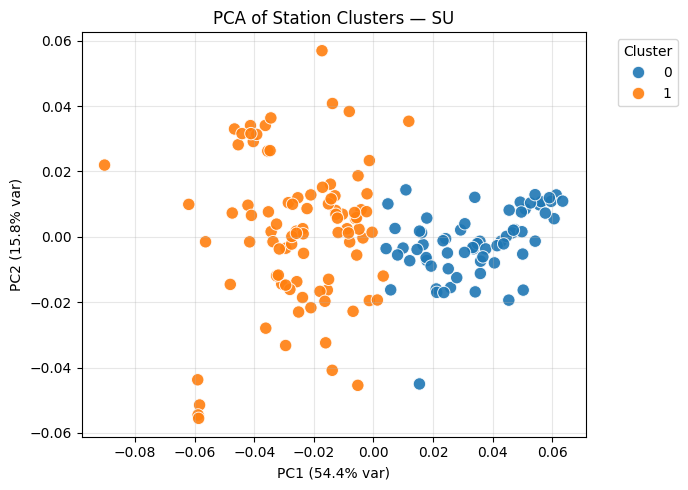

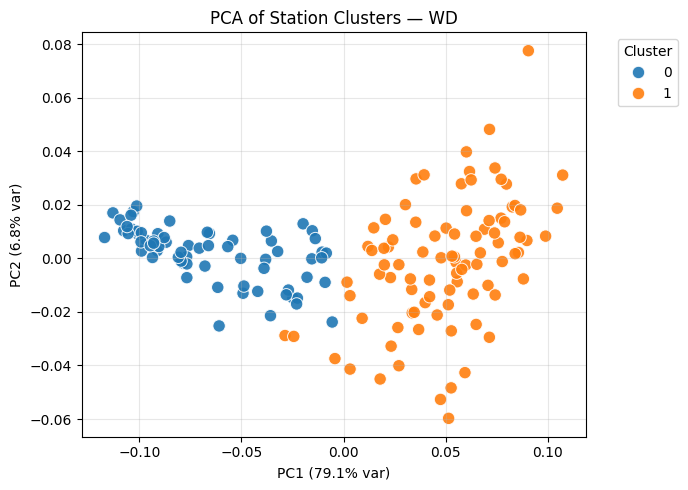

=== Weekday Cluster 0 (n=69) ===


,station_id,code,name,date_type,cluster
475,1,05100,Banderas P. Central,WD,0
476,2,09000,Cabecera Usme,WD,0
477,3,05000,Portal Américas,WD,0
478,4,07000,Portal Sur JFK Coop. Financiera,WD,0
479,5,57503,Ampliacion San Mateo,WD,0
...,...,...,...,...,...
612,138,02103,Mazurén,WD,0
615,141,02001,Centro Comercial Santa Fe,WD,0
624,151,40001,Juan Pablo II,WD,0
625,152,40002,Manitas,WD,0


=== Weekday Cluster 1 (n=90) ===


,station_id,code,name,date_type,cluster
489,15,09105,Río Fucha,WD,1
499,25,05107,Américas - Cr.53,WD,1
504,30,12001,Carrera 43 - COMAPAN,WD,1
508,34,02304,Heroes - Gel hada,WD,1
510,36,50008,Corral Portal Dorado,WD,1
...,...,...,...,...,...
629,156,09122,Calle 72,WD,1
630,159,09124,Temporal Calle 34 - Fondo Nacional de Garantias,WD,1
631,160,09125,Temporal Calle 57,WD,1
632,161,09126,Temporal Marly,WD,1


In [15]:
# Define how many clusters to use per day type
N_CLUSTERS_BY_TYPE = {
    "WD": 2,   # Weekdays
    "SA": 2,   # Saturdays
    "SU": 2,   # Sundays
    "HO": 2,   # Holidays
}

# Run clustering using the new dictionary
cluster_df, summary_df = cluster_stations_by_daytype(
    features_df,
    n_clusters_by_type=N_CLUSTERS_BY_TYPE,
    seed=SEED,
)

# Visualize PCA per day type
visualize_clusters_per_date_type(cluster_df)

# Example: display each WD cluster’s stations
wd_n_clusters = N_CLUSTERS_BY_TYPE["WD"]

for n in range(wd_n_clusters):
    filtered_df = summary_df[
        (summary_df["date_type"] == "WD") & (summary_df["cluster"] == n)
    ]
    print(f"=== Weekday Cluster {n} (n={len(filtered_df)}) ===")
    display(filtered_df)
